In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2

In [ ]:
image_path = '/content/drive/MyDrive/Image_classification_usingSVM/Celebs/maria_sharapova/Pretty-Maria-Sharapova-4-SW4155.jpg'
img = cv2.imread(image_path)  # For color image
gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # For grayscale image

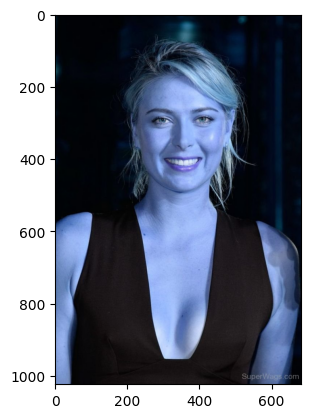

In [ ]:
plt.imshow(img)

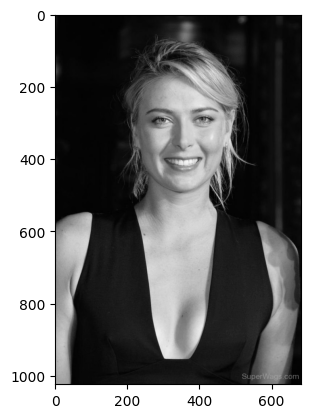

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[202, 174, 307, 307]], dtype=int32)

In [ ]:
(x, y, w, h) = faces[0]

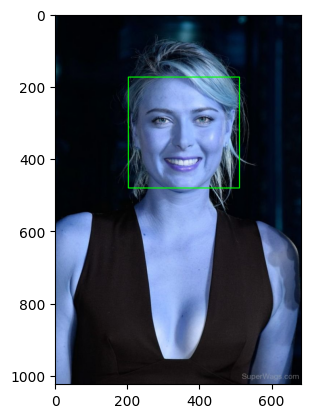

In [ ]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

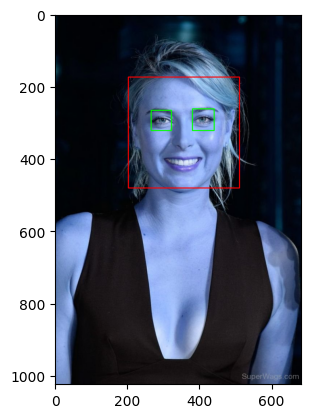

In [ ]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

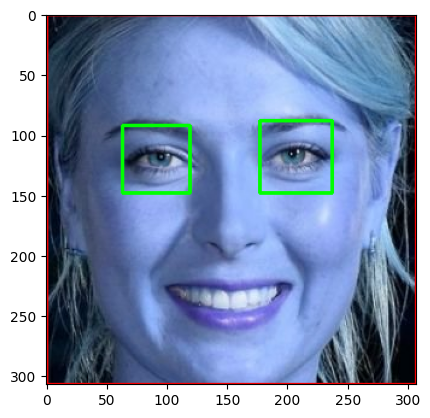

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [ ]:
original_image = cv2.imread(image_path)
cropped_image = get_cropped_image_if_2_eyes(image_path)

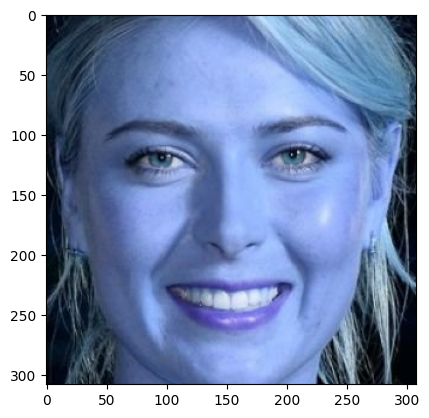

In [ ]:
plt.imshow(cropped_image)

In [ ]:
# Paths
path_to_data = "/content/drive/MyDrive/Image_classification_usingSVM/Celebs"  # Path to the dataset folder
path_to_cr_data = "/content/drive/MyDrive/Image_classification_usingSVM/cropped"  # Path to save cropped images

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
if not os.path.exists(path_to_data):
    print(f"Dataset folder '{path_to_data}' does not exist. Please upload it.")
    raise FileNotFoundError("Dataset not found!")

In [ ]:
import shutil
# Remove existing cropped folder and create a new one
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.makedirs(path_to_cr_data, exist_ok=True)

In [ ]:
# Get subdirectories in the dataset folder
img_dirs = [entry.path for entry in os.scandir(path_to_data) if entry.is_dir()]

# Dictionary to store cropped image paths by celebrity name
cropped_image_dirs = []
celebrity_file_names_dict = {}

In [ ]:
# Process each directory
for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)  # Get celebrity name
    print(f"Processing images for: {celebrity_name}")

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)

                # Create directory for cropped images if it doesn't exist
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print(f"Generating cropped images in folder: {cropped_folder}")

                # Save the cropped image
                cropped_file_name = f"{celebrity_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)

                # Save path to dictionary
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

# Check results
print("Cropped images generated successfully.")
print("Celebrity-wise cropped image paths:")
for celeb, file_list in celebrity_file_names_dict.items():
    print(f"{celeb}: {len(file_list)} images")

Processing images for: lionel_messi
Generating cropped images in folder: /content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi
Processing images for: virat_kohli
Generating cropped images in folder: /content/drive/MyDrive/Image_classification_usingSVM/cropped/virat_kohli
Processing images for: serena_williams
Generating cropped images in folder: /content/drive/MyDrive/Image_classification_usingSVM/cropped/serena_williams
Processing images for: roger_federer
Generating cropped images in folder: /content/drive/MyDrive/Image_classification_usingSVM/cropped/roger_federer
Processing images for: maria_sharapova
Generating cropped images in folder: /content/drive/MyDrive/Image_classification_usingSVM/cropped/maria_sharapova
Cropped images generated successfully.
Celebrity-wise cropped image paths:
lionel_messi: 25 images
virat_kohli: 32 images
serena_williams: 24 images
roger_federer: 14 images
maria_sharapova: 26 images


In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['/content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi/lionel_messi_1.png',
  '/content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi/lionel_messi_2.png',
  '/content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi/lionel_messi_3.png',
  '/content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi/lionel_messi_4.png',
  '/content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi/lionel_messi_5.png',
  '/content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi/lionel_messi_6.png',
  '/content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi/lionel_messi_7.png',
  '/content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi/lionel_messi_8.png',
  '/content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi/lionel_messi_9.png',
  '/content/drive/MyDrive/Image_classification_usingSVM/cropped/lionel_messi/lionel_messi_10.png',
  '

## Wevlet Transformation for extracting feature from image

In [ ]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pywt
import cv2

In [ ]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

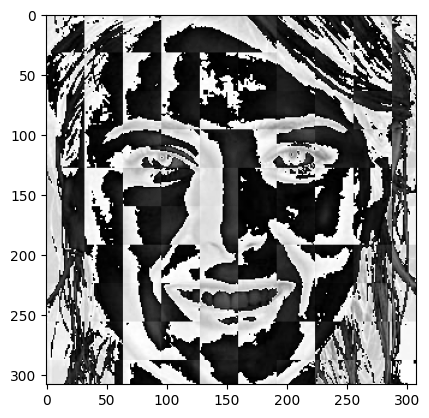

In [ ]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
# celebrity_file_names_dict

In [ ]:
class_dict = {}
count = 0
for celebrity_name, training_files in celebrity_file_names_dict.items():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'virat_kohli': 1,
 'serena_williams': 2,
 'roger_federer': 3,
 'maria_sharapova': 4}

In [ ]:
X = []
y = []
for celebrity_name, trainning_files in celebrity_file_names_dict.items():
    for img_path in trainning_files:
      img = cv2.imread(img_path)
      if img is None:
        continue
      scalled_raw_image = cv2.resize(img, (32, 32))
      img_har = w2d(img,'db1',5)
      scalled_img_har = cv2.resize(img_har, (32, 32))
      combined_img = np.vstack((scalled_raw_image.reshape(32 * 32 * 3, 1),scalled_img_har.reshape(32 * 32, 1)))
      y.append(class_dict[celebrity_name])
      X.append(combined_img)

In [ ]:
len(X[0])

4096

In [ ]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(106, 4096)

In [ ]:
X[0]

array([ 35.,  30.,  31., ...,  54.,  87., 195.])

## Model Building and trainning

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7037037037037037

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.57      1.00      0.73         4
           2       0.67      0.40      0.50         5
           3       1.00      0.33      0.50         3
           4       0.78      1.00      0.88         7

    accuracy                           0.70        27
   macro avg       0.75      0.67      0.65        27
weighted avg       0.73      0.70      0.68        27



## Using GridSearch to find out best model parameter

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_score,best_params
0,svm,0.835000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.568333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.796667,{'logisticregression__C': 1}


In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.8148148148148148

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 0, 1, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 4, 0, 1],
       [2, 0, 0, 1, 0],
       [1, 0, 0, 0, 6]])

Text(95.72222222222221, 0.5, 'Truth')

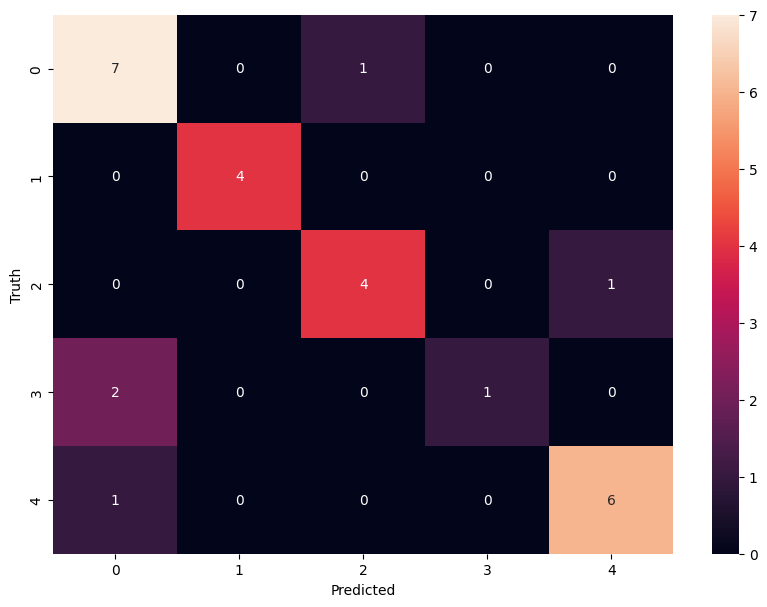

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')